In [71]:
import numpy as np
import pandas as pd
import seaborn as sns
from math import floor,ceil
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
import warnings
warnings.simplefilter('ignore', DeprecationWarning)

In [72]:
df=pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data",sep=" ",header=None)
headers=["Status of existing checking account","Duration in month","Credit history",\
         "Purpose","Credit amount","Savings account/bonds","Present employment since",\
         "Installment rate in percentage of disposable income","Personal status and sex",\
         "Other debtors / guarantors","Present residence since","Property","Age in years",\
        "Other installment plans","Housing","Number of existing credits at this bank",\
        "Job","Number of people being liable to provide maintenance for","Telephone","foreign worker","Cost Matrix(Risk)"]

df.columns=headers

#for structuring only
Status_of_existing_checking_account={'A14':"no checking account",'A11':"<0 DM", 'A12': "0 <= <200 DM",'A13':">= 200 DM "}
df["Status of existing checking account"]=df["Status of existing checking account"].map(Status_of_existing_checking_account)

Credit_history={"A34":"critical account","A33":"delay in paying off","A32":"existing credits paid back duly till now","A31":"all credits at this bank paid back duly","A30":"no credits taken"}
df["Credit history"]=df["Credit history"].map(Credit_history)

Purpose={"A40" : "car (new)", "A41" : "car (used)", "A42" : "furniture/equipment", "A43" :"radio/television" , "A44" : "domestic appliances", "A45" : "repairs", "A46" : "education", 'A47' : 'vacation','A48' : 'retraining','A49' : 'business','A410' : 'others'}
df["Purpose"]=df["Purpose"].map(Purpose)

Saving_account={"A65" : "no savings account","A61" :"<100 DM","A62" : "100 <= <500 DM","A63" :"500 <= < 1000 DM", "A64" :">= 1000 DM"}
df["Savings account/bonds"]=df["Savings account/bonds"].map(Saving_account)

Present_employment={'A75':">=7 years", 'A74':"4<= <7 years",  'A73':"1<= < 4 years", 'A72':"<1 years",'A71':"unemployed"}
df["Present employment since"]=df["Present employment since"].map(Present_employment)


Personal_status_and_sex={ 'A95':"female:single",'A94':"male:married/widowed",'A93':"male:single", 'A92':"female:divorced/separated/married", 'A91':"male:divorced/separated"}
df["Personal status and sex"]=df["Personal status and sex"].map(Personal_status_and_sex)


Other_debtors_guarantors={'A101':"none", 'A102':"co-applicant", 'A103':"guarantor"}
df["Other debtors / guarantors"]=df["Other debtors / guarantors"].map(Other_debtors_guarantors)


Property={'A121':"real estate", 'A122':"savings agreement/life insurance", 'A123':"car or other", 'A124':"unknown / no property"}
df["Property"]=df["Property"].map(Property)


Other_installment_plans={'A143':"none", 'A142':"store", 'A141':"bank"}
df["Other installment plans"]=df["Other installment plans"].map(Other_installment_plans)

Housing={'A153':"for free", 'A152':"own", 'A151':"rent"}
df["Housing"]=df["Housing"].map(Housing)


Job={'A174':"management/ highly qualified employee", 'A173':"skilled employee / official", 'A172':"unskilled - resident", 'A171':"unemployed/ unskilled  - non-resident"}
df["Job"]=df["Job"].map(Job)

Telephone={'A192':"yes", 'A191':"none"}
df["Telephone"]=df["Telephone"].map(Telephone)


foreign_worker={'A201':"yes", 'A202':"no"}
df["foreign worker"]=df["foreign worker"].map(foreign_worker)


risk={1:"High Risk", 2:"Low Risk"}
df["Cost Matrix(Risk)"]=df["Cost Matrix(Risk)"].map(risk)

In [73]:
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,Cost Matrix(Risk)
0,<0 DM,6,critical account,radio/television,1169,no savings account,>=7 years,4,male:single,none,4,real estate,67,none,own,2,skilled employee / official,1,yes,yes,High Risk
1,0 <= <200 DM,48,existing credits paid back duly till now,radio/television,5951,<100 DM,1<= < 4 years,2,female:divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes,Low Risk
2,no checking account,12,critical account,education,2096,<100 DM,4<= <7 years,2,male:single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes,High Risk
3,<0 DM,42,existing credits paid back duly till now,furniture/equipment,7882,<100 DM,4<= <7 years,2,male:single,guarantor,4,savings agreement/life insurance,45,none,for free,1,skilled employee / official,2,none,yes,High Risk
4,<0 DM,24,delay in paying off,car (new),4870,<100 DM,1<= < 4 years,3,male:single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes,Low Risk


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bonds                                     1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [75]:
def visualize_distribution(attr):
    good_risk_df = df[df["Cost Matrix(Risk)"]=="High Risk"]
    bad_risk_df = df[df["Cost Matrix(Risk)"]=="Low Risk"]
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
    attr_good_risk_df = good_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    attr_bad_risk_df = bad_risk_df[[attr, 'Cost Matrix(Risk)']].groupby(attr).count()
    ax[0].barh( attr_good_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_good_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#5975A4")
    ax[1].barh( attr_bad_risk_df['Cost Matrix(Risk)'].index.tolist(), attr_bad_risk_df['Cost Matrix(Risk)'].tolist(), align='center', color="#B55D60")
    ax[0].set_title('High Risk')
    ax[1].set_title('Low Risk')
    ax[0].invert_xaxis()
    ax[1].yaxis.tick_right()
    
    num_para_change=["Present residence since","Number of existing credits at this bank","Installment rate in percentage of disposable income","Number of people being liable to provide maintenance for"]
    if attr in num_para_change:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            # ax[0].text(v+15, i+1, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+2, i+1, str(v), color='black')
    else:
        for i, v in enumerate(attr_good_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[0].text(v+25, i + .05, str(v), color='black')
        for i, v in enumerate(attr_bad_risk_df['Cost Matrix(Risk)'].tolist()):
            ax[1].text(v+1, i + .05, str(v), color='black')
    plt.suptitle(attr)
    plt.tight_layout()
    plt.show()

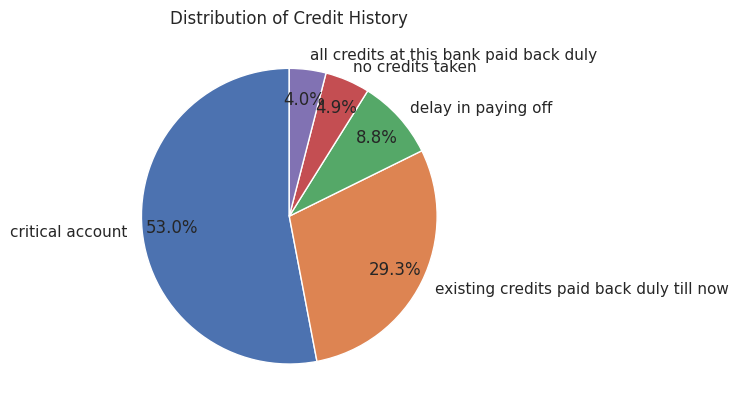

In [67]:
# Sample data
labels = df['Credit history'].unique()
sizes = [30, 20, 15, 35]  # Values or proportions for each category

# Create the pie chart
plt.pie(df['Credit history'].value_counts(), labels=labels, autopct='%1.1f%%', startangle=90,pctdistance=0.80)

# Aspect ratio ensures that pie is drawn as a circle
# plt.axis('equal')

# Add a title
plt.title('Distribution of Credit History')

# Display the chart
plt.show()

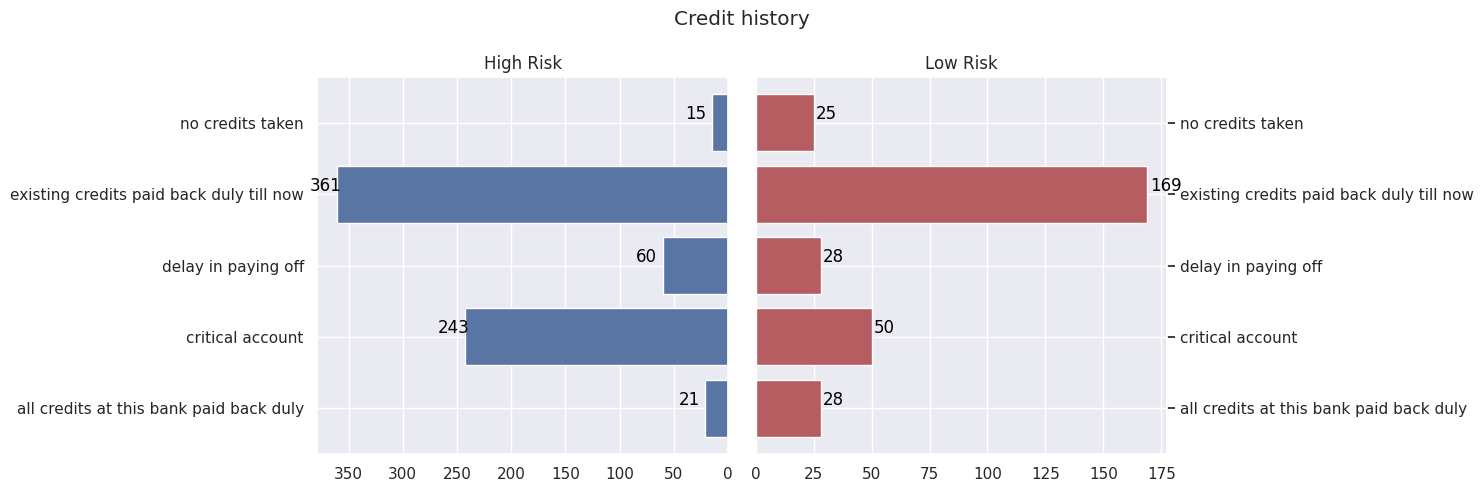

In [76]:
visualize_distribution("Credit history")

It can be seen that a good credit history indiviuals has a critical account which could be a key factor while lending money to an individual for unsecured purchase.

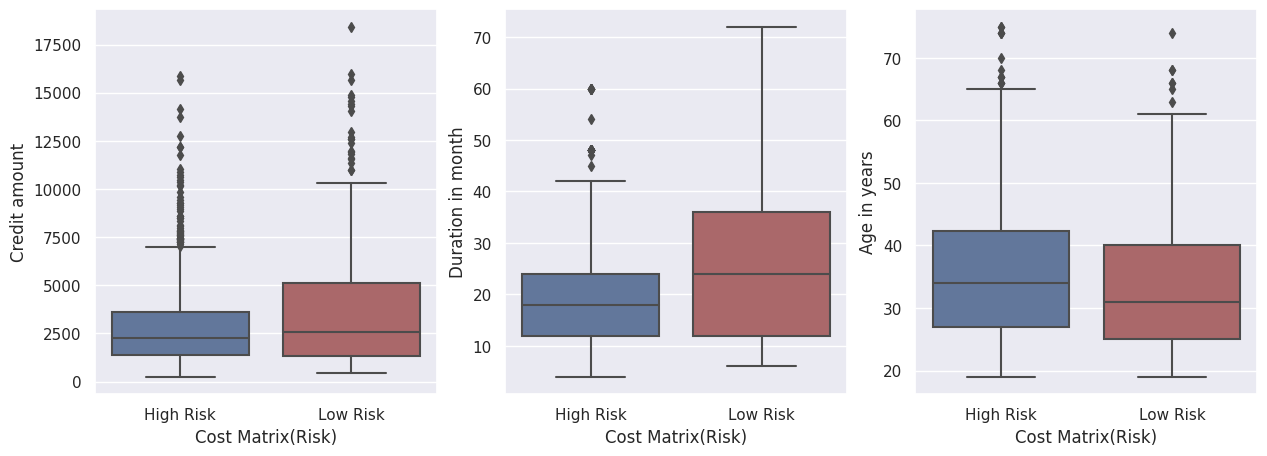

In [66]:
sns.set()
f, axes = plt.subplots(1, 3,figsize=(15,5))
sns.boxplot(y=df["Credit amount"],x=df["Cost Matrix(Risk)"],orient='v' , ax=axes[0],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Duration in month"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[1],palette=["#5975A4","#B55D60"]) #box plot
sns.boxplot(y=df["Age in years"],x=df["Cost Matrix(Risk)"], orient='v' , ax=axes[2],palette=["#5975A4","#B55D60"]) #box plot
plt.show()

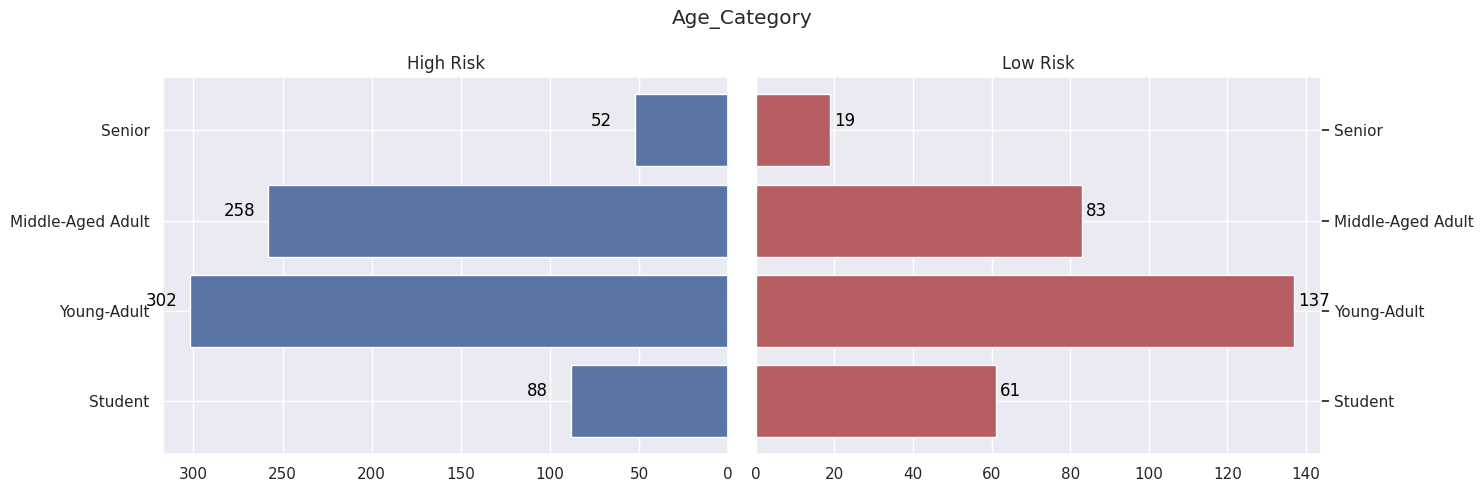

In [65]:
age_interval = [18, 24, 35, 55, 120]
age_category = ['Student', 'Young-Adult', 'Middle-Aged Adult', 'Senior']
df["Age_Category"] = pd.cut(df["Age in years"], age_interval, labels=age_category)
visualize_distribution("Age_Category")

Based on the age group young-adult are more exposure to risk when it comes to credit utilisation.

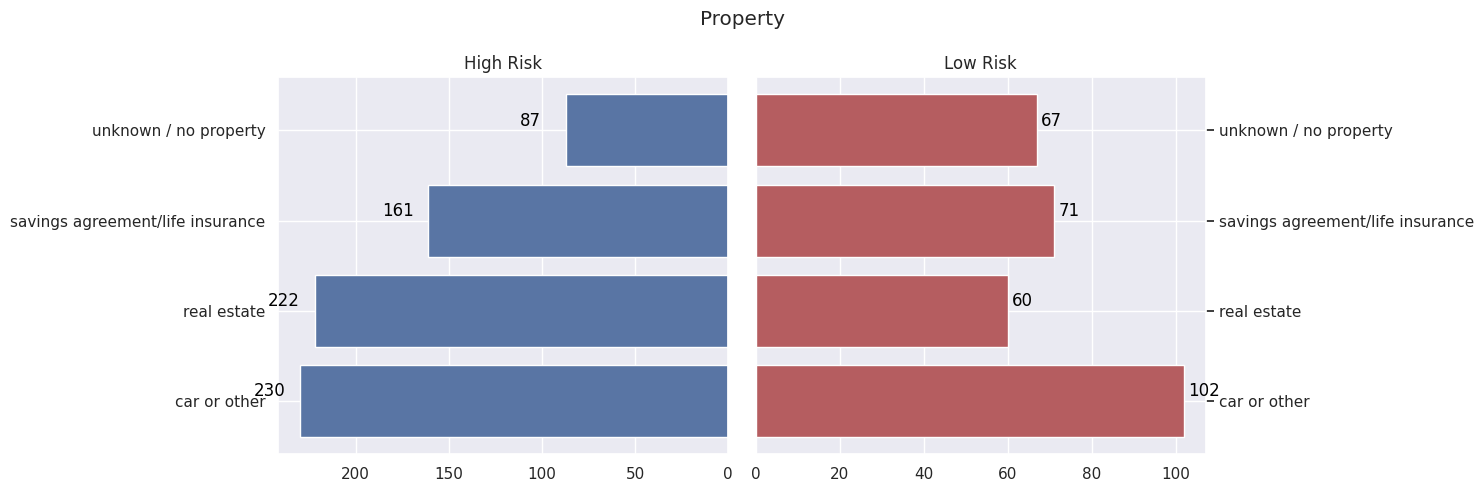

In [70]:
visualize_distribution("Property")

Property or a backed asset is a significant factor that plays an important role when it comes to indiviudal risk to lose the job.